In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
# Specify the path to your CSV file
file_path = '/content/drive/MyDrive/ECE F366:DRO using RL/data_consumer.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [4]:
df.describe()

,dataid,gen,use,myid
count,2.810560e+06,2.810560e+06,2.810560e+06,2.810560e+06
mean,4.908825e+03,8.515726e-01,1.382901e+00,4.050000e+01
std,3.069854e+03,1.389467e+00,1.432613e+00,2.309221e+01
min,2.600000e+01,-1.744000e-01,0.000000e+00,1.000000e+00
25%,2.181500e+03,-6.933333e-03,4.329333e-01,2.075000e+01
50%,4.954500e+03,-1.200000e-03,8.252000e-01,4.050000e+01
75%,7.946250e+03,1.321267e+00,1.793933e+00,6.025000e+01
max,9.982000e+03,1.149840e+01,2.065873e+01,8.000000e+01


In [5]:
df.head()

,dataid,local_15min,gen,use,myid
0,26,2016-01-01 00:00:00,-0.002000,0.518533,1
1,26,2016-01-01 00:15:00,-0.001400,0.585400,1
2,26,2016-01-01 00:30:00,-0.000667,0.587933,1
3,26,2016-01-01 00:45:00,-0.001000,0.416667,1
4,26,2016-01-01 01:00:00,-0.001000,0.423600,1


In [6]:
df = df.drop(df.columns[0], axis=1)
df.head()

,local_15min,gen,use,myid
0,2016-01-01 00:00:00,-0.002000,0.518533,1
1,2016-01-01 00:15:00,-0.001400,0.585400,1
2,2016-01-01 00:30:00,-0.000667,0.587933,1
3,2016-01-01 00:45:00,-0.001000,0.416667,1
4,2016-01-01 01:00:00,-0.001000,0.423600,1


In [7]:
df = df.drop(df.columns[-1], axis=1)
df.head()

,local_15min,gen,use
0,2016-01-01 00:00:00,-0.002000,0.518533
1,2016-01-01 00:15:00,-0.001400,0.585400
2,2016-01-01 00:30:00,-0.000667,0.587933
3,2016-01-01 00:45:00,-0.001000,0.416667
4,2016-01-01 01:00:00,-0.001000,0.423600


In [8]:
df['datetime_column'] = pd.to_datetime(df['local_15min'], format='%Y-%m-%d %H:%M:%S')
df.head()

,local_15min,gen,use,datetime_column
0,2016-01-01 00:00:00,-0.002000,0.518533,2016-01-01 00:00:00
1,2016-01-01 00:15:00,-0.001400,0.585400,2016-01-01 00:15:00
2,2016-01-01 00:30:00,-0.000667,0.587933,2016-01-01 00:30:00
3,2016-01-01 00:45:00,-0.001000,0.416667,2016-01-01 00:45:00
4,2016-01-01 01:00:00,-0.001000,0.423600,2016-01-01 01:00:00


In [9]:
df = df.drop(df.columns[0], axis=1)
df.head()

,gen,use,datetime_column
0,-0.002000,0.518533,2016-01-01 00:00:00
1,-0.001400,0.585400,2016-01-01 00:15:00
2,-0.000667,0.587933,2016-01-01 00:30:00
3,-0.001000,0.416667,2016-01-01 00:45:00
4,-0.001000,0.423600,2016-01-01 01:00:00


In [10]:
df = df.drop(df.columns[0], axis=1)
df.head()

,use,datetime_column
0,0.518533,2016-01-01 00:00:00
1,0.585400,2016-01-01 00:15:00
2,0.587933,2016-01-01 00:30:00
3,0.416667,2016-01-01 00:45:00
4,0.423600,2016-01-01 01:00:00


In [ ]:
df['use'].dtype


In [11]:
df = df.rename(columns={'use': 'price'})

In [12]:
df.head()

,price,datetime_column
0,0.518533,2016-01-01 00:00:00
1,0.585400,2016-01-01 00:15:00
2,0.587933,2016-01-01 00:30:00
3,0.416667,2016-01-01 00:45:00
4,0.423600,2016-01-01 01:00:00


In [13]:
na_count = df['price'].isna().sum()
print(na_count)

0


In [14]:
df['price'].count()

2810560

In [15]:
import matplotlib.pyplot as plt

In [16]:


indices_to_keep = list(range(0, 2810560, 4))
df = df.iloc[indices_to_keep]
df.head()

,price,datetime_column
0,0.518533,2016-01-01 00:00:00
4,0.423600,2016-01-01 01:00:00
8,0.424933,2016-01-01 02:00:00
12,0.555333,2016-01-01 03:00:00
16,0.513000,2016-01-01 04:00:00


In [17]:
df

,price,datetime_column
0,0.518533,2016-01-01 00:00:00
4,0.423600,2016-01-01 01:00:00
8,0.424933,2016-01-01 02:00:00
12,0.555333,2016-01-01 03:00:00
16,0.513000,2016-01-01 04:00:00
...,...,...
2810540,0.306533,2016-12-31 19:00:00
2810544,0.214867,2016-12-31 20:00:00
2810548,0.196800,2016-12-31 21:00:00
2810552,0.129000,2016-12-31 22:00:00


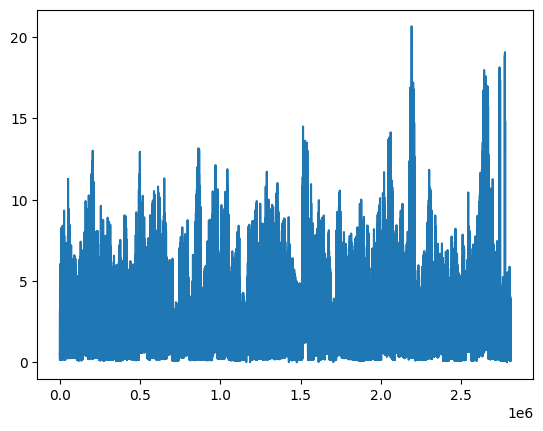

In [18]:
plt.plot(df['price'])



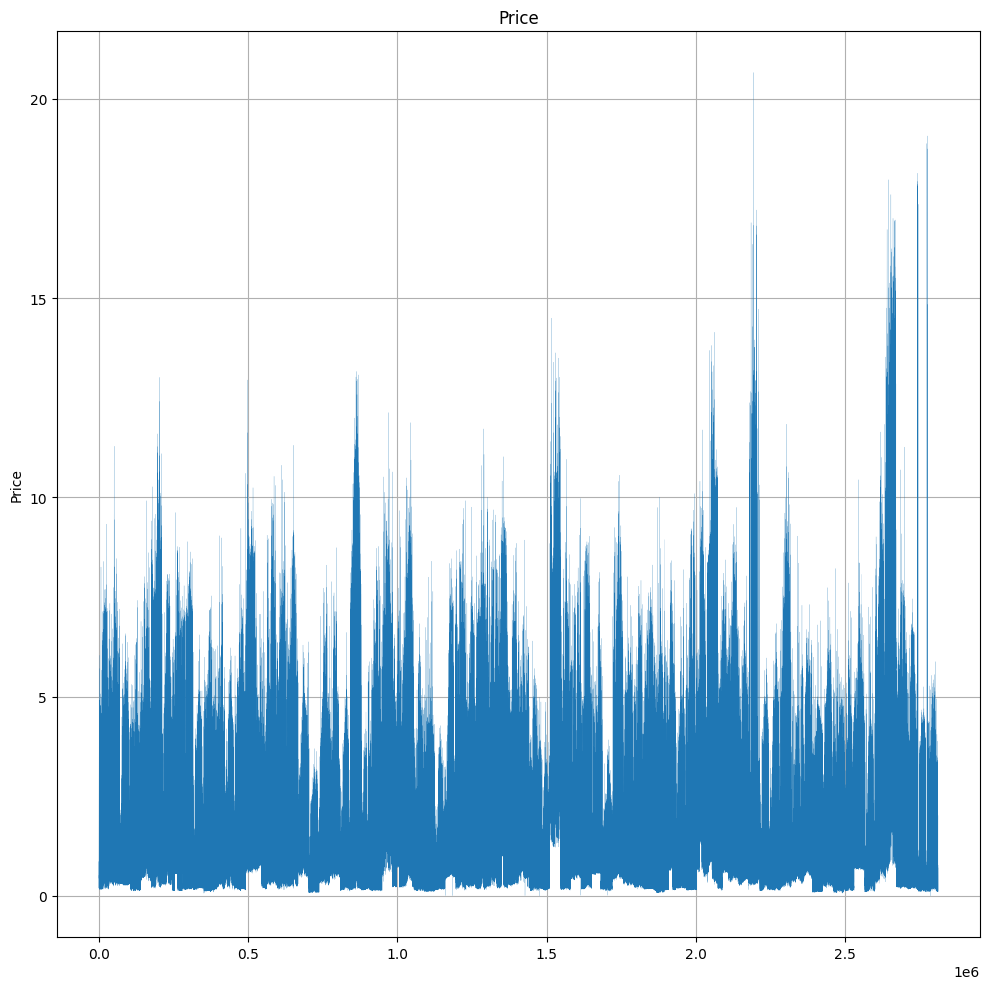

In [19]:
# Plot the 'Price' column
plt.figure(figsize=(10, 10))
plt.plot(df['price'], linewidth=0.1)

plt.title('Price')

plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
new_df = df.iloc[:2400]
new_df

,price,datetime_column
0,0.518533,2016-01-01 00:00:00
4,0.423600,2016-01-01 01:00:00
8,0.424933,2016-01-01 02:00:00
12,0.555333,2016-01-01 03:00:00
16,0.513000,2016-01-01 04:00:00
...,...,...
9580,0.774067,2016-04-09 20:00:00
9584,1.083933,2016-04-09 21:00:00
9588,1.378733,2016-04-09 22:00:00
9592,1.983000,2016-04-09 23:00:00


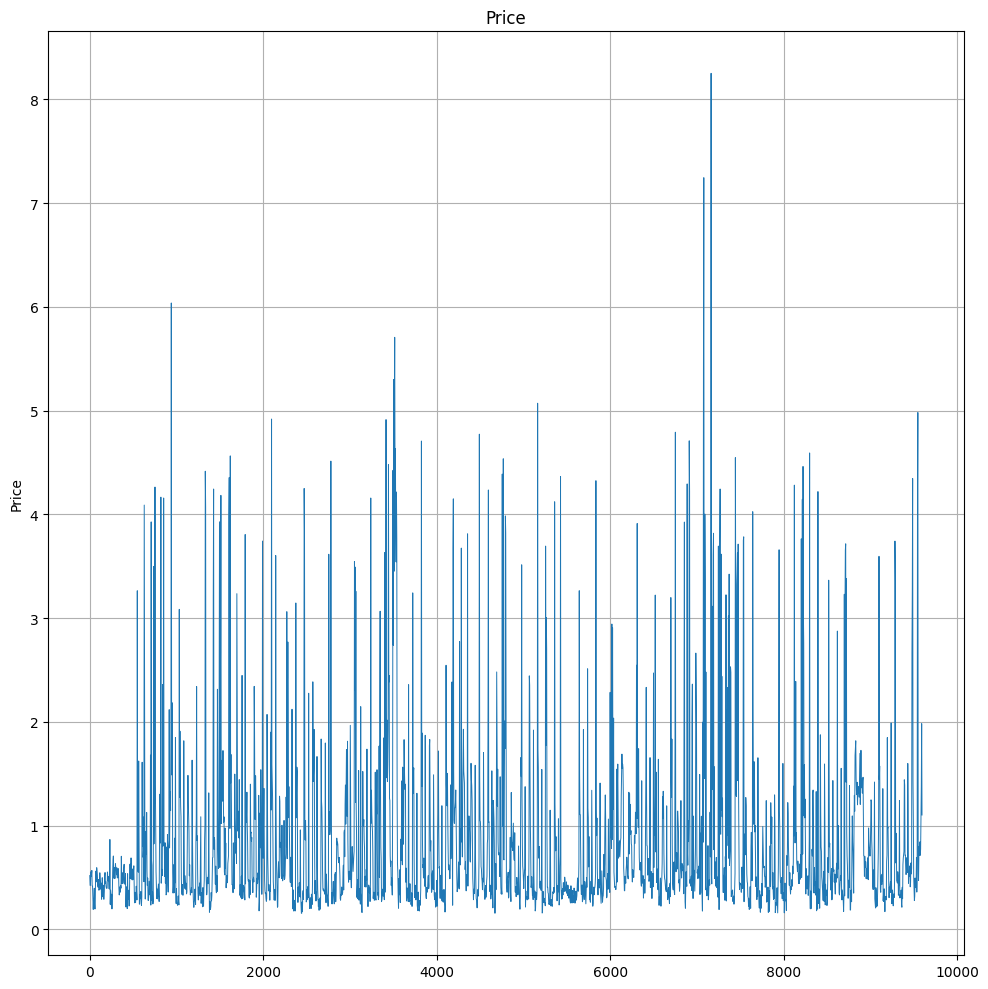

In [21]:
# Plot the 'Price' column
plt.figure(figsize=(10, 10))
plt.plot(new_df['price'], linewidth=0.7)

plt.title('Price')

plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

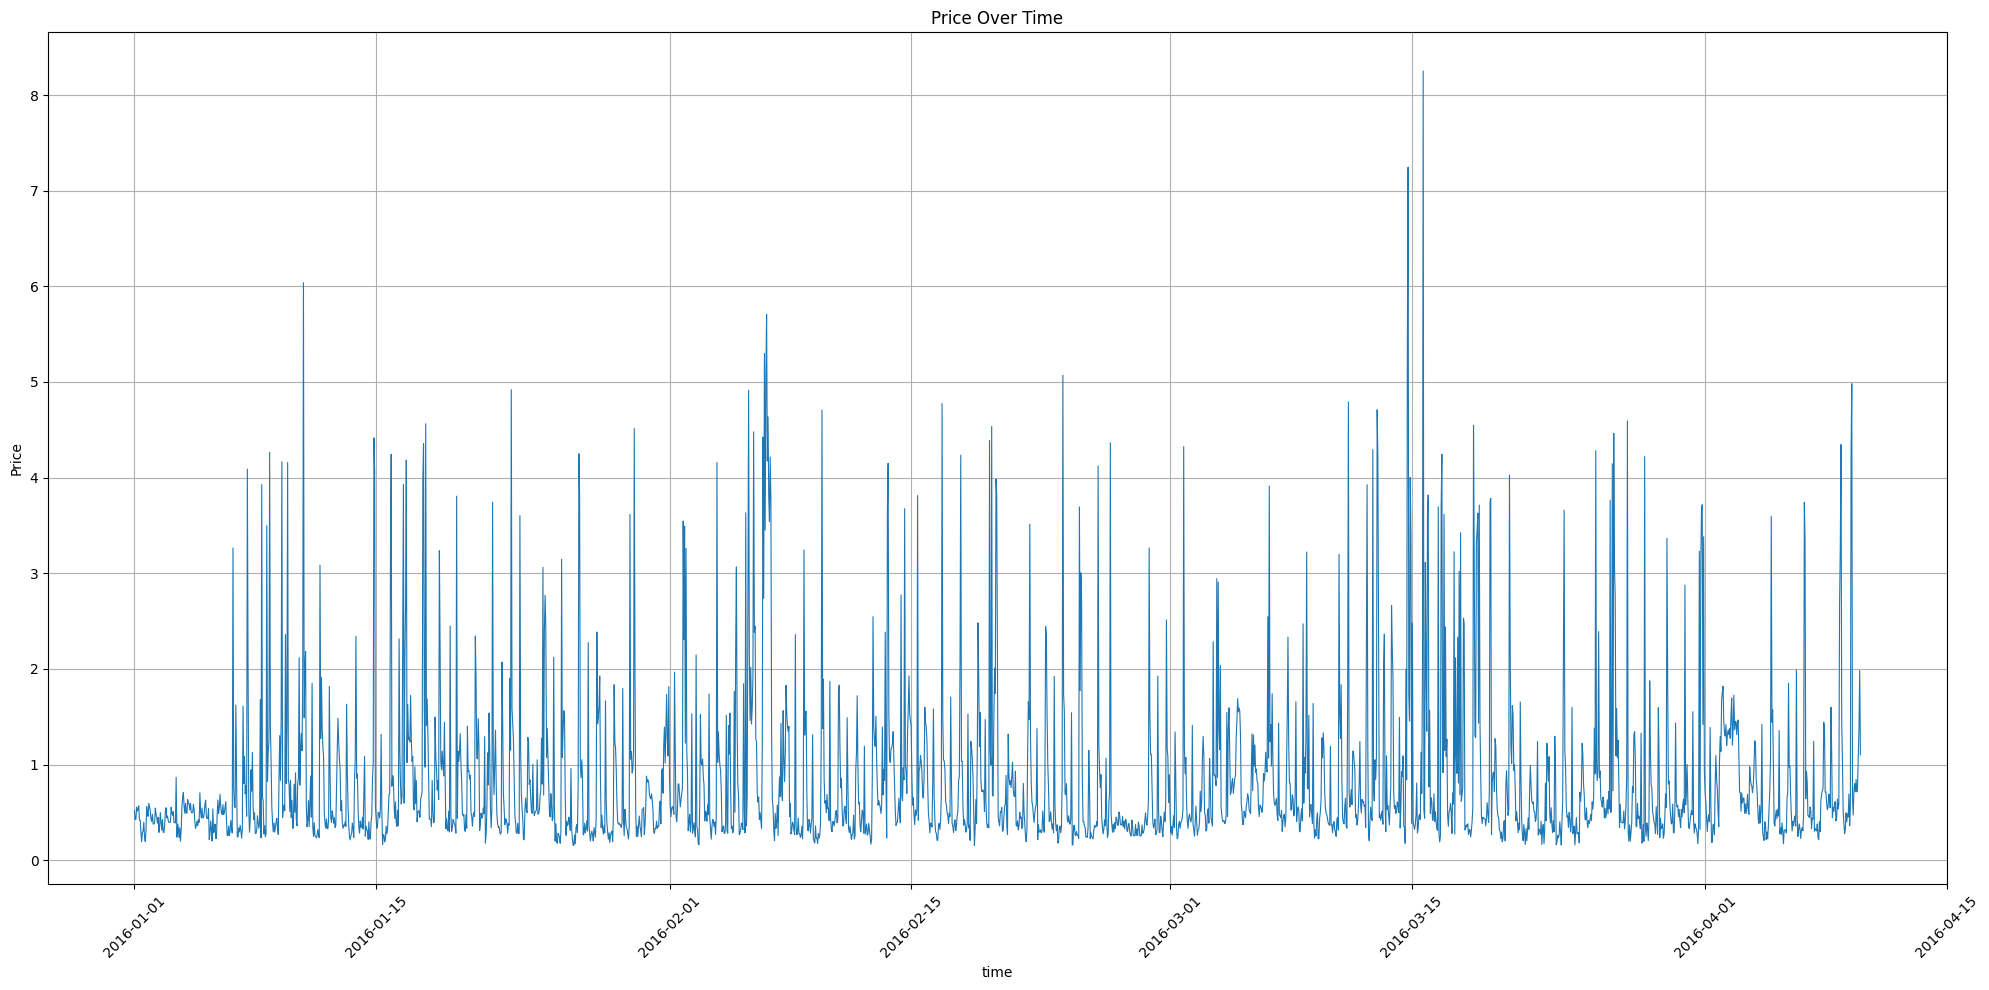

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(new_df['datetime_column'], new_df['price'], linewidth= 0.8)
plt.title('Price Over Time')
plt.xlabel('time')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [23]:
try_df = new_df.reset_index()['price']
try_df.describe()


count    2400.000000
mean        0.848588
std         0.883232
min         0.155067
25%         0.365033
50%         0.515067
75%         0.956550
max         8.251000
Name: price, dtype: float64

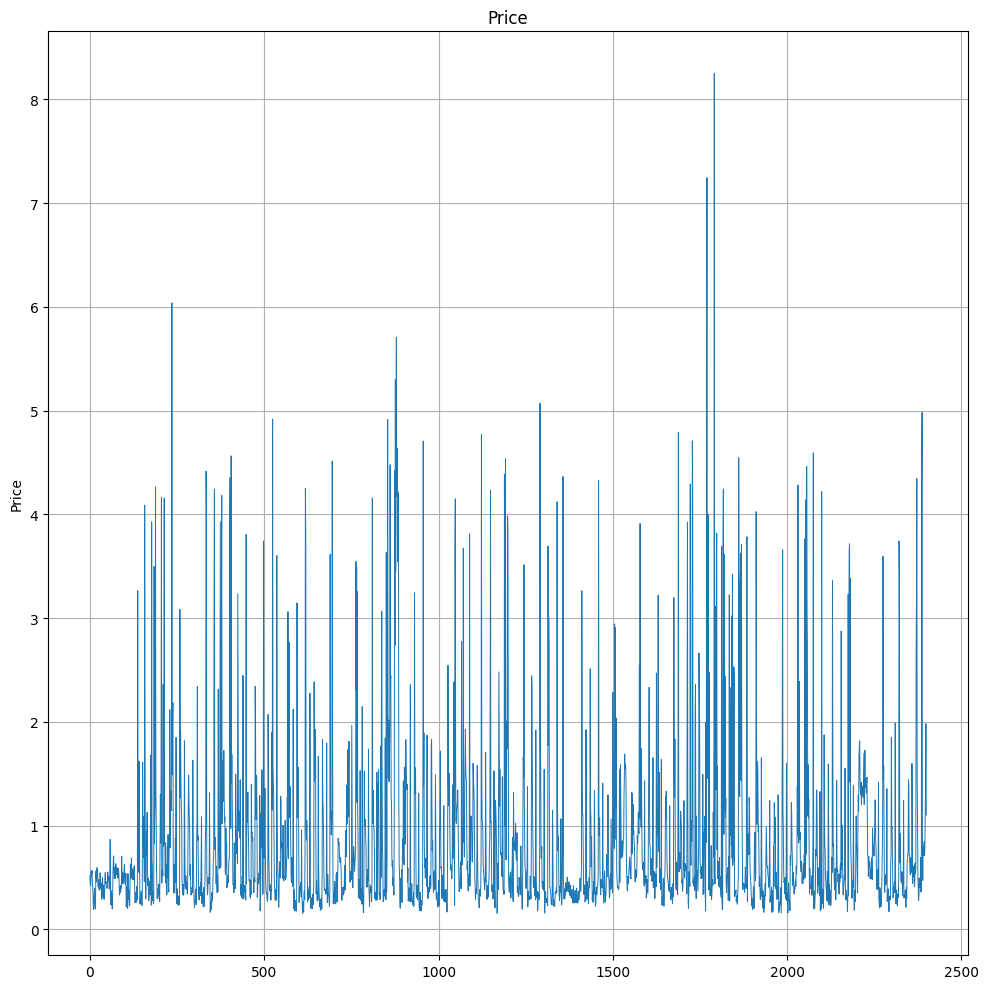

In [24]:
# Plot the 'Price' column
plt.figure(figsize=(10, 10))
plt.plot(try_df, linewidth=0.7)

plt.title('Price')

plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

### LSTMs are sensitive to scale of the data so we will normalise the prices in the range of 0 to 1

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
scaled_df= scaler.fit_transform(np.array(try_df).reshape(-1,1))

In [26]:
print(scaled_df.min())
print(scaled_df.max())

0.0
0.9999999999999999


### time series train test split can be done by splitting the dataset


In [27]:
training_size =int(len(scaled_df)*0.65)
test_size=len(scaled_df)-training_size
train_data, test_data=scaled_df[0:training_size,:], scaled_df[training_size:len(scaled_df), :1]

In [28]:
training_size, test_size

(1560, 840)

In [29]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [50]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [51]:
print(X_train)
print(X_train.shape)

[[0.04489497 0.03316892 0.03333361 ... 0.04109882 0.05374715 0.05830911]
 [0.03316892 0.03333361 0.04944046 ... 0.05374715 0.05830911 0.03740149]
 [0.03333361 0.04944046 0.0442115  ... 0.05830911 0.03740149 0.03460997]
 ...
 [0.03095381 0.03572987 0.04674775 ... 0.09316612 0.1440888  0.07058688]
 [0.03572987 0.04674775 0.515024   ... 0.1440888  0.07058688 0.14254893]
 [0.04674775 0.515024   0.12396347 ... 0.07058688 0.14254893 0.10207594]]
(1459, 100)


In [52]:
print(y_train)
print(y_train.shape)

[0.03740149 0.03460997 0.03469231 ... 0.14254893 0.10207594 0.12966181]
(1459,)


Reshaping X_train to make it LSTM compatible

In [53]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [54]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### creating the Stacked LSTM model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# Add a 1D Convolutional layer to capture local patterns
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Add LSTM layers to capture sequential dependencies
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=64))

# Add Dropout layers to reduce overfitting
model.add(Dropout(0.2))

# Flatten the output from LSTM layers
model.add(Flatten())

# Add a Dense layer for the output
model.add(Dense(units=1))

# Compile the model with a suitable learning rate
optimizer = Adam(lr=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Implement early stopping to monitor validation loss and prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 98, 64)            256       
                                                                 
 lstm_2 (LSTM)               (None, 98, 64)            33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 66369 (259.25 KB)
Trainable params: 6636

In [58]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size =32, verbose =1)

Epoch 1/50
46/46 [==============================] - 21s 382ms/step - loss: 0.0117 - val_loss: 0.0143
Epoch 2/50
46/46 [==============================] - 7s 157ms/step - loss: 0.0108 - val_loss: 0.0131
Epoch 3/50
46/46 [==============================] - 5s 119ms/step - loss: 0.0102 - val_loss: 0.0131
Epoch 4/50
46/46 [==============================] - 7s 156ms/step - loss: 0.0098 - val_loss: 0.0130
Epoch 5/50
46/46 [==============================] - 5s 118ms/step - loss: 0.0094 - val_loss: 0.0128
Epoch 6/50
46/46 [==============================] - 6s 139ms/step - loss: 0.0095 - val_loss: 0.0129
Epoch 7/50
46/46 [==============================] - 6s 132ms/step - loss: 0.0093 - val_loss: 0.0131
Epoch 8/50
46/46 [==============================] - 5s 119ms/step - loss: 0.0093 - val_loss: 0.0128
Epoch 9/50
46/46 [==============================] - 7s 155ms/step - loss: 0.0089 - val_loss: 0.0126
Epoch 10/50
46/46 [==============================] - 5s 119ms/step - loss: 0.0090 - val_loss: 0.013

In [59]:
import tensorflow as tf

In [ ]:
tf.__version__

In [60]:
# prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


24/24 [==============================] - 1s 29ms/step


In [61]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
# RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.7848753444968014

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.7880700542937167

In [64]:
import matplotlib.pyplot as plt

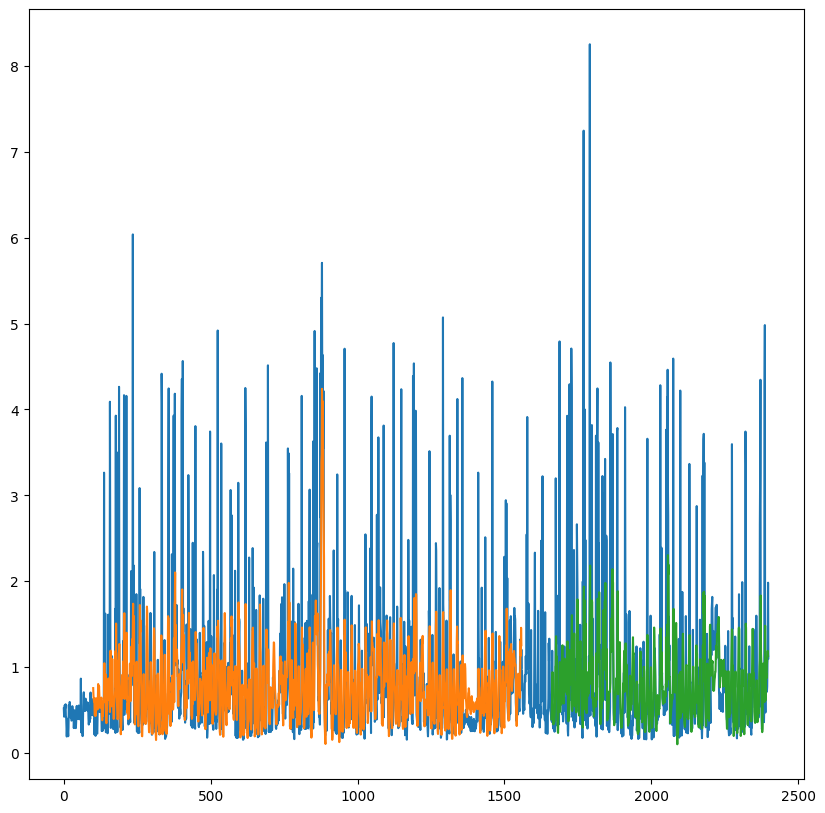

In [66]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(scaled_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(scaled_df)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(10, 10))
plt.plot(scaler.inverse_transform(scaled_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()